In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
path = '/home/kpierce/Desktop/reverting-onecell/data/'
files = [f for f in os.listdir(path) if f.endswith('.npy') and 'analysis' in f]
data = [np.load(path+f,allow_pickle=True).item() for f in files]
for d in data: # add in a flow attribute
    d['flow'] = d['filename'].split('/')[-1].split('-')[0].split('_')[1]
# colors for plotting
colors = {'a':'red','g':'magenta', 'i':'green','l':'orange','n':'blue'}
for d in data:
    d['color']= colors[d['flow']]
a = 0.3 # particle radius 
dx = 22.5 # control volume cell size 
phi = 0.6 # packing fraction 
n0 = 21 #initial number of moving particles 
m0 = 50000 # initial number of stationary particles 
z1 = np.pi*a**2/(phi*dx) # relevant length scale of bed elevations

In [3]:
lvals = [d['l'] for d in data]
flows = [d['flow'] for d in data]
n_means_anc = [d['ancey_n_stats']['n_mean'] for d in data]
n_devs_anc = [np.sqrt(d['ancey_n_stats']['n_var']) for d in data]
m_means = []
m_devs = []
n_means = []
n_devs = []
for d in data:
    m,pm = d['m_pdf'].T
    mean = (m*pm).sum()
    std = np.sqrt(((m-mean)**2*pm).sum())
    m_means.append(mean)
    m_devs.append(std)
    n,pn = d['n_pdf'].T
    mean = (n*pn).sum()
    std = np.sqrt(((n-mean)**2*pn).sum())
    n_means.append(mean)
    n_devs.append(std)

In [ ]:
plt.scatter(lvals,m_means,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$mean(m)$')

In [ ]:
plt.scatter(lvals,m_devs,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$std(m)$')

In [ ]:
plt.scatter(lvals,n_means,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$mean(n)$')

In [ ]:
plt.scatter(lvals,n_devs,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$std(n)$')

In [ ]:
for d in data:
    t,cdf = d['rt_cdf'].T
    l = d['l']
    E = d['E']
    plt.loglog(E*t*z1/l,cdf,color=colors[d['flow']])
plt.ylim(1e-6,10)
plt.xlim(1e-5,1e6)

In [ ]:
# now look at deviations from ancey n statistics
meanshift = np.array(n_means)-np.array(n_means_anc)
plt.scatter(lvals,meanshift,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$deviation between mean(n) ancey and me$')

In [ ]:
# now look at deviations from ancey n statistics
varshift = np.array(n_devs)-np.array(n_devs_anc)
plt.scatter(lvals,varshift,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$deviation between var(n) ancey and me$')

# now make the publication figures

In [ ]:
from matplotlib import rcParams
rcParams['axes.labelsize'] = 20
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 16
from matplotlib import rcParams
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = True
rcParams['figure.figsize'] = 6,5
rcParams.update({'font.size': 22})
rcParams['lines.linewidth']=3
rcParams['lines.markersize']=5

In [ ]:
colors=[colors[key] for key in flows]


In [ ]:
# make the variance plot ... 
#colors=[colors[key] for key in flows]
lvals = np.array(lvals)
m_devs = np.array(m_devs)
plt.scatter(lvals/z1,m_devs,color=colors)
#plt.xlim(1e-7,1e3)
#plt.ylim(1e-6,1e2)
#plt.legend()
#plt.xlabel(r'$l\text{ [units of }a$')
#plt.ylabel(r'$\text{var}(m)$')
x = np.linspace(0,180,100)
plt.plot(x,x,'--',color='black',zorder=-1,label='1-to-1 line: $R^2=0.997$')
plt.xlim(0,165)
plt.ylim(0,165)
plt.ylabel("std$(m)$")
plt.xlabel("$l/z_1$ [unitless]")

plt.legend()



#textstr = '$R^2=0.997$'
#props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
#ax = plt.gca()
#ax.text(0.15, 0.8, textstr, transform=ax.transAxes, fontsize=16,
#        verticalalignment='top', bbox=props)

plt.savefig('../jgr/figures/variance.pdf',bbox_inches='tight',dpi=600)

In [ ]:
# panel (a) 
dats = sorted([d for d in data if d['l']==a and d['flow']!='l'],key=lambda x: x['flow'])
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t/3600
    plt.loglog(t,cdf,color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
plt.xlim(1e-7,1e3)
plt.ylim(1e-6,1e2)
plt.legend()
#plt.xlabel('Resting time $T$ [hours]')
plt.ylabel('Non-exceedance probability')

textstr = '(a)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

plt.savefig('../jgr/figures/1.pdf',bbox_inches='tight',dpi=600)

In [ ]:
# panel (b) 
dats = sorted([d for d in data if d['l']==a and d['flow']!='l'],key=lambda x:x['flow'])
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t
    E = d['E']
    l = d['l']
    plt.loglog(t*E/l*z1,cdf,color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
plt.xlim(1e-4,1e8)
plt.ylim(1e-6,1e2)
plt.legend()
#plt.xlabel('Scaled resting time $T/T_0$ [unitless]')
#plt.ylabel('Non-exceedance probability')

textstr = '(b)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
x = np.geomspace(5e3,1e6)
y = 1e-2*(x/1e3)**(-1.18)
plt.loglog(x,y,'--',color='black')
plt.savefig('../jgr/figures/2.pdf',bbox_inches='tight',dpi=600)

In [ ]:
# panel c 
incl = [1.0,2.0,5.0,10.0]
dats = sorted([d for d in data if d['flow']=='g' and round(d['l']/a,1) in incl],key=lambda x:x['l'])
lines = ['-','--','-.',':']
i=0
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t/3600
    E = d['E']
    l = d['l']
    plt.loglog(t,cdf,linestyle=lines[i],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
    i+=1
plt.xlim(1e-7,1e3)
plt.ylim(1e-6,1e2)
plt.legend()
plt.xlabel('Resting time $T$')
plt.ylabel('Non-exceedance probability')

textstr = '(c)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)


plt.savefig('../jgr/figures/3.pdf',bbox_inches='tight',dpi=600)

In [ ]:
# panel d 
incl = [1.0,2.0,5.0,10.0]
dats = sorted([d for d in data if d['flow']=='g' and round(d['l']/a,1) in incl],key=lambda x:x['l'])
lines = ['-','--','-.',':']
i=0
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t
    E = d['E']
    l = d['l']
    plt.loglog(t*E/l*z1,cdf,linestyle=lines[i],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
    i+=1
plt.xlim(1e-4,1e8)
plt.ylim(1e-6,1e2)
plt.legend()
plt.xlabel('Scaled resting time $T/T_0$ [unitless]')
#plt.ylabel('Non-exceedance probability')

textstr = '(d)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

#ax.vlines(1e3,1e-7,1e3)
x = np.geomspace(5e3,1e6)
y = 1e-2*(x/1e3)**(-1.18)
plt.loglog(x,y,'--',color='black')
plt.text(0.85, 0.335,r'$ \big( \frac{T}{T_0}\big)^{-1.18}$', horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)


plt.savefig('../jgr/figures/4.pdf',bbox_inches='tight',dpi=600)

In [ ]:
from scipy import optimize
from scipy.special import gamma, factorial
def nbin(k,r,p):
    return gamma(k+r)/gamma(r)/factorial(k)*p**r*(1-p)**k

# now make the particle activity figure 
dats = sorted([x for x in data if round(x['l']/a,1)==1.0],key = lambda x: x['flow'])
i = 0 
for d in dats:
    n,pn = d['n_pdf'].T
    if i==0:
        lam = 5.45+6.59 # sum of lambdas 
        mu = 3.74
        alph = 4.64 + 0.77# sig + nu 
        ds = 1
    elif i==1:
        lam = 7.74 + 8.42
        mu = 4.34
        alph = 4.95 + 0.56
        ds = 2
    elif i==2:
        lam = 15.56 + 22.07
        mu = 3.56
        alph = 4.52 + 0.68   
        ds = 2
    elif i==3:
        lam = 15.52 + 14.64
        mu = 4.32
        alph = 4.77 + 0.48
        ds = 3
    elif i==4:
        lam = 15.45 + 24.49
        mu = 3.64
        alph = 4.21 + 0.36
        ds = 3
    plt.scatter(n[::ds],pn[::ds],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
    popt, _ = optimize.curve_fit(nbin, n, pn,p0=[lam/mu,1-mu/alph])
    
    if i!=4:
        plt.plot(n, nbin(n, *popt),color='grey',lw=2,zorder=-1)
        if i==0:
            POPT = np.copy(popt)
    if i==4:
        plt.plot(n, nbin(n, *popt),color='grey',lw=2,zorder=-1,label='NegBin fit')

    i += 1
plt.xlim(-2,80)
plt.ylim(0,0.12)
plt.xlabel('Particle activity $n$')
plt.ylabel('Probability distribution')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,5,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],borderpad=0.25,handlelength=1.0)

textstr = '(a)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

plt.savefig('../jgr/figures/activity.pdf',bbox_inches='tight',dpi=600)

In [ ]:
lam = 5.45+6.59 # sum of lambdas 
mu = 3.74
alph = 4.64 + 0.77# sig + nu 
r,p = lam/mu,1-mu/alph
n = np.linspace(0,34,100)
plt.plot(n,nbin(n,r,p), color='black')
#plt.ylabel('$p(n)$',fontsize=35,rotation=0)
#plt.xlabel('$n$')
plt.xlim(0,36)
plt.ylim(0,0.18)
plt.tick_params(axis='both', which='both', bottom=False, left=False,labelleft=False)
#plt.xticks([-0.5,31],['0','$n$'])
ax = plt.gca()
#ax.tick_params(axis='x', which='major', labelsize=35)
ax.annotate('', xy=(0,0.99), xycoords='axes fraction', xytext=(0,15), 
            textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0, 
                           facecolor='black'))
ax.annotate('', xy=(0.99,0), xycoords='axes fraction', xytext=(15,0), 
            textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0, 
                           facecolor='black'))
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth=8
ax.spines['bottom'].set_linewidth=8
#yaxis.set_label_coords(-0.1,1.02)

ax.spines['top'].set_visible(False)
ax.yaxis.set_label_coords(-0.1,0.8)
plt.savefig('../jgr/figures/negbin.png',bbox_inches='tight',dpi=600,pad_inches=0)

In [ ]:
from scipy import optimize

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)


rcParams['lines.markersize']=6

dats = sorted([x for x in data if round(x['l']/a,1) in [1.0,2.0,5.0] and x['flow']=='i'],key = lambda x: x['l'])
i=0
for d in dats:
    m,pm = d['m_pdf'].T
    m = m-(m*pm).sum()
    m = z1*m/a
    if i==0:
        ds = 1
        marker = '^'
    elif i==1:
        ds = 10
        marker = 'o'
    elif i==2:
        ds = 10
        marker = 'v'
    plt.scatter(m[::ds],pm[::ds],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)),marker=marker)
    
    mean = (m*pm).sum()
    std = np.sqrt(((m-mean)**2*pm).sum())
    popt, _ = optimize.curve_fit(gaussian, m, pm, p0 = [pm.max(),mean,std])
    if i!=2:
        plt.plot(m, gaussian(m, *popt),color='grey',lw=2,zorder=-1)
    if i==2:
        plt.plot(m, gaussian(m, *popt),color='grey',lw=2,zorder=-1,label='Gaussian fit')

    
    i+=1
plt.xlim(-10,10)
plt.ylim(0,0.03)
plt.xlabel('Bed elevation $z_1 m$ [units of $a$]')
#plt.ylabel('Probability distribution')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],borderpad=0.25,handlelength=1.0)
rcParams['lines.markersize']=5



textstr = '(b)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)




plt.savefig('../jgr/figures/ele.pdf',bbox_inches='tight',dpi=600)
#plt.legend(borderpad=0,handlelength=1.0)

In [ ]:
m = np.linspace(-25,25,100)
plt.plot(m,gaussian(m,0.05,0,2), color='black')
#plt.ylabel('$p(m)$',fontsize=35)
plt.xlim(-20,20)
plt.ylim(0,0.055)
plt.tick_params(axis=None, which='both', bottom=False, left=False,labelleft=False)
plt.xticks(None)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=35)

ax.annotate('', xy=(0.99,0), xycoords='axes fraction', xytext=(15,0), 
            textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0, 
                           facecolor='black'))
ax.annotate('', xy=(0.5,0.99), xycoords='axes fraction', xytext=(0,15), 
            textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0, 
                           facecolor='black'))
ax.annotate('', xy=(0.01,0), xycoords='axes fraction', xytext=(-15,0), 
            textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0, 
                           facecolor='black'))
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position('center')

ax.spines['left'].set_linewidth=8
ax.spines['bottom'].set_linewidth=8
ax.spines['top'].set_visible(False)
ax.yaxis.set_label_coords(0.48,0.25)
plt.savefig('../jgr/figures/gauss.png',bbox_inches='tight',dpi=600,pad_inches=0)

In [4]:
# get the real pdf
dats = np.load('../data/flow_a-l_0.6-time_1500.0hr_CAT.npy')

In [ ]:
# final figure .. show series of bedload transport and bed elevation

In [5]:
n,m,t = dats.T

In [ ]:
mask = ( t > 500 ) & ( t < 500 + 3600*3 ) 

In [ ]:
from matplotlib import rcParams
rcParams['axes.labelsize'] = 20
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 16
from matplotlib import rcParams
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = True
rcParams['figure.figsize'] = 12,5
rcParams.update({'font.size': 22})
rcParams['lines.linewidth']=1
rcParams['lines.markersize']=5

In [ ]:
color = (101,73,48,192)
color = tuple(np.array(color)/255.0)
plt.plot((t[mask]-t[mask].min())/3600,(m[mask]-m.mean())*z1,color='black')
#plt.xlabel('Time [hours]')
#plt.ylabel('Bed elevation [units of $a$]')
#plt.gcf().set_size_inches(15, 5)
plt.xlim(-0.01,3.01)
plt.ylim(-2.5,2.5)
#plt.hlines(0,0,3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig('../jgr/figures/bed_ele.pdf',bbox_inches='tight',dpi=600,pad_inches=0)

# Now try to get the correlation function of m

In [8]:
import scipy
from scipy import signal 

In [ ]:
dats = np.load('../data/flow_a-l_0.6-time_1500.0hr_CAT.npy')
n,m,t = dats.T

In [99]:
# take 1 hrs of data
tt = t[t<20*3600]
mm = m[t<20*3600]

In [100]:
N = tt.size//1000
ttt=np.linspace(tt.min(),tt.max(),N)
mrs = scipy.signal.resample(mm,N)
mrs = mrs -mrs.mean()

/home/kpierce/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/kpierce/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]


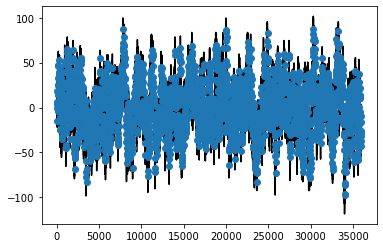

In [52]:
plt.scatter(ttt,mrs)
plt.plot(tt,mm-mm.mean(),color='black',zorder=-1)

In [53]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]/result.max()
c = autocorr(mrs)
tc = np.linspace(0,(ttt[1]-ttt[0])*c.size,c.size)

In [89]:
param = np.polyfit(tc[tc<300], np.log(c[tc<300]), 1)

In [92]:
np.exp(np.dot(param,np.array([1,-tf])))

array([9.89517183e-01, 4.84963012e-01, 2.37680687e-01, 1.16487458e-01,
       5.70905788e-02, 2.79801297e-02, 1.37130797e-02, 6.72078923e-03,
       3.29386316e-03, 1.61432447e-03, 7.91181467e-04, 3.87758549e-04,
       1.90040716e-04, 9.31390781e-05, 4.56475225e-05, 2.23718803e-05,
       1.09644730e-05, 5.37369534e-06, 2.63365157e-06, 1.29075434e-06,
       6.32599538e-07, 3.10037443e-07, 1.51949552e-07, 7.44705738e-08,
       3.64980764e-08, 1.78877309e-08, 8.76678851e-09, 4.29660873e-09,
       2.10577072e-09, 1.03203959e-09, 5.05803273e-10, 2.47894512e-10,
       1.21493261e-10, 5.95439258e-11, 2.91825166e-11, 1.43023703e-11,
       7.00960095e-12, 3.43540997e-12, 1.68369665e-12, 8.25180819e-13,
       4.04421654e-13, 1.98207314e-13, 9.71415332e-14, 4.76091283e-14,
       2.33332646e-14, 1.14356481e-14, 5.60461855e-15, 2.74682718e-15,
       1.34622178e-15, 6.59784167e-16, 3.23360648e-16, 1.58479263e-16,
       7.76707894e-17, 3.80665042e-17, 1.86564184e-17, 9.14352272e-18,
      

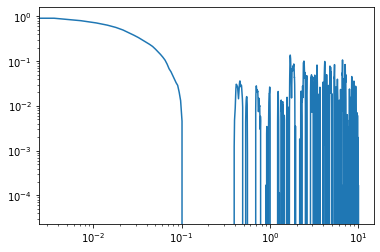

In [96]:
plt.loglog(tc/3600,c)
#plt.xlim(0,600/3600)
#plt.ylim(0,1)

In [ ]:
plt.plot(result,'x')

In [ ]:
plt.loglog(T*E*z1/l,C,'x')

In [ ]:
alphas = []
sigmas = []
for number in range(len(data)):
    T,C = data[number]['rt_cdf'].T
    E = data[number]['E']
    l = d['l']
    T = T*E*z1/l
    pdf = np.diff(1.0-C)[(T>1e3)[1:]]
    T = T[T>1e3]
    plt.loglog(T,pdf,'x',color='purple')
    n = len(pdf)
    alpha = 1+n/np.log(TT/1e3).sum()
    sig = (alpha+1)/np.sqrt(n)
    print(r'alpha is ${} \pm {}$'.format(round(alpha,3),round(sig,3)))
    alphas.append(alpha)
    sigmas.append(sig)
    plt.show()

In [ ]:
# using the method explained in newman2005 gives a mean value of alpha
np.mean(alphas)

In [ ]:
np.mean(sigmas)